In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
pd.options.display.float_format = '{:.3f}'.format

In [238]:
#Conexión Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
#Carga de datos
churn_df = pd.read_csv('/content/drive/MyDrive/models/customers_churn/customers_churn.csv')

In [240]:
churn_df.head()

,customer_id,tenure_months,monthly_fee,total_usage_hours,num_support_tickets,contract_type,has_discount,churn
0,1,39,30.550,862.300,1,monthly,0,1
1,2,52,65.650,1380.100,4,monthly,0,1
2,3,29,41.840,125.800,3,annual,0,0
3,4,15,61.650,1831.300,0,monthly,0,0
4,5,43,108.330,890.300,0,monthly,0,1


In [241]:
print(churn_df.shape)

(200, 8)


## Limpieza de datos

In [242]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          200 non-null    int64  
 1   tenure_months        200 non-null    int64  
 2   monthly_fee          200 non-null    float64
 3   total_usage_hours    200 non-null    float64
 4   num_support_tickets  200 non-null    int64  
 5   contract_type        200 non-null    object 
 6   has_discount         200 non-null    int64  
 7   churn                200 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 12.6+ KB


In [243]:
churn_df['contract_type'] = churn_df['contract_type'].astype('category')
churn_df['has_discount'] = churn_df['has_discount'].astype('category')

In [244]:
churn_df.nunique().sort_values(ascending=True)

,0
has_discount,2
churn,2
contract_type,2
num_support_tickets,8
tenure_months,57
monthly_fee,196
total_usage_hours,200
customer_id,200


In [245]:
churn_df.duplicated().sum()

np.int64(0)

In [246]:
churn_df.isnull()

,customer_id,tenure_months,monthly_fee,total_usage_hours,num_support_tickets,contract_type,has_discount,churn
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False


In [247]:
churn_df.isnull().sum(axis=1).sort_values(ascending=False)

,0
0,0
1,0
2,0
3,0
4,0
...,...
195,0
196,0
197,0
198,0


##  EDA

In [248]:
#Separación de dataset

churn_df.drop(columns='customer_id', inplace=True)
df_num = churn_df.select_dtypes(include=np.number)
df_cat = churn_df.select_dtypes(exclude=np.number)

print(df_num.shape)
print(df_cat.shape)

(200, 5)
(200, 2)


## Analisis Univariado

In [249]:
#Conteo de churn
churn_df['churn'].value_counts()

,count
churn,
1,113
0,87


In [250]:
churn_df['churn'].value_counts(normalize=True)

,proportion
churn,
1,0.565
0,0.435


Text(0.5, 1.0, 'Distribución de churn')

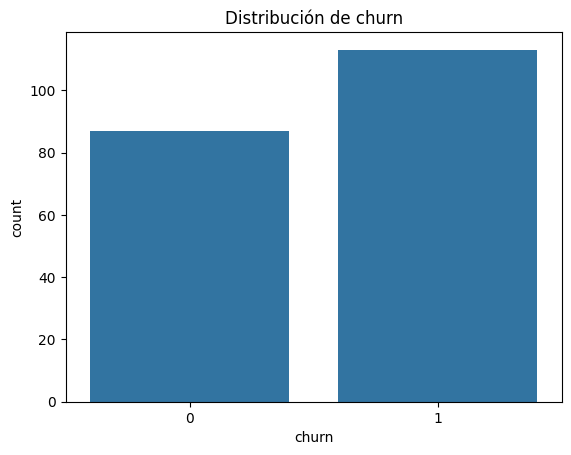

In [251]:
sns.countplot(x='churn', data=churn_df)
plt.title('Distribución de churn')

Se observa que la mayoría abandona

In [252]:
churn_df['contract_type'].value_counts(normalize=True)

,proportion
contract_type,
monthly,0.600
annual,0.400


In [253]:
churn_df['has_discount'].value_counts(normalize=True)

,proportion
has_discount,
0,0.765
1,0.235


In [254]:
df_num_statistic = df_num.describe().T
df_num_statistic

,count,mean,std,min,25%,50%,75%,max
tenure_months,200.000,29.190,16.735,1.000,15.000,28.500,43.250,59.000
monthly_fee,200.000,69.164,28.503,20.050,45.570,65.690,91.287,119.770
total_usage_hours,200.000,1015.514,572.150,40.500,524.175,1002.650,1476.725,1991.900
num_support_tickets,200.000,2.065,1.501,0.000,1.000,2.000,3.000,8.000
churn,200.000,0.565,0.497,0.000,0.000,1.000,1.000,1.000


In [255]:
df_num_statistic['rango'] = df_num_statistic.loc[:,'max']-df_num_statistic.loc [:,'min']
df_num_statistic

,count,mean,std,min,25%,50%,75%,max,rango
tenure_months,200.000,29.190,16.735,1.000,15.000,28.500,43.250,59.000,58.000
monthly_fee,200.000,69.164,28.503,20.050,45.570,65.690,91.287,119.770,99.720
total_usage_hours,200.000,1015.514,572.150,40.500,524.175,1002.650,1476.725,1991.900,1951.400
num_support_tickets,200.000,2.065,1.501,0.000,1.000,2.000,3.000,8.000,8.000
churn,200.000,0.565,0.497,0.000,0.000,1.000,1.000,1.000,1.000


<Axes: >

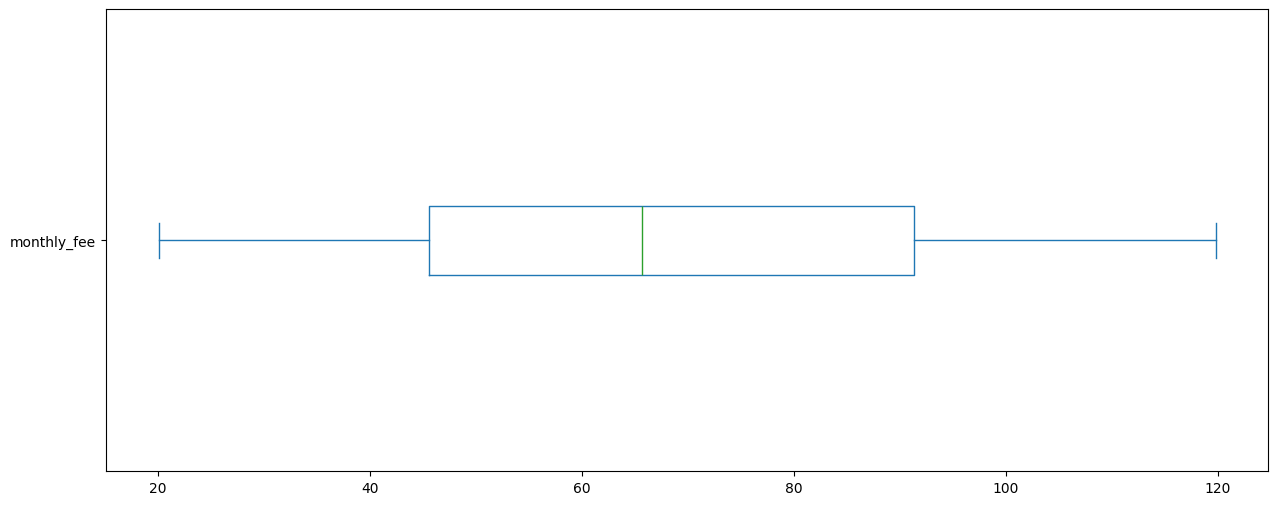

In [256]:
df_num['monthly_fee'].plot.box(figsize = (15,6), vert=False)

<Axes: >

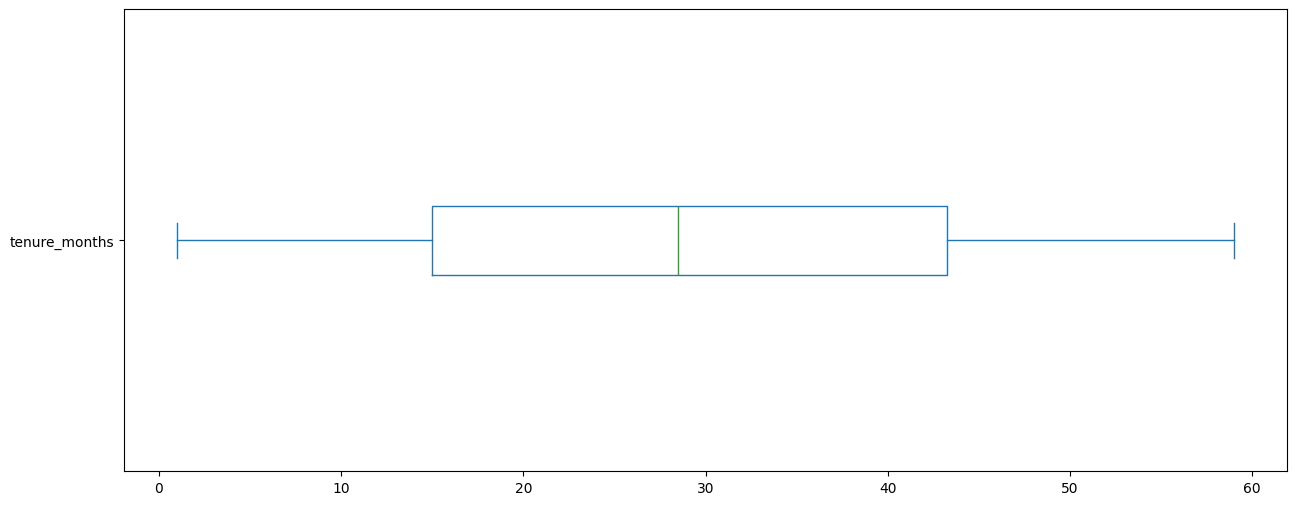

In [257]:
df_num['tenure_months'].plot.box(figsize = (15,6), vert=False)

<Axes: ylabel='Frequency'>

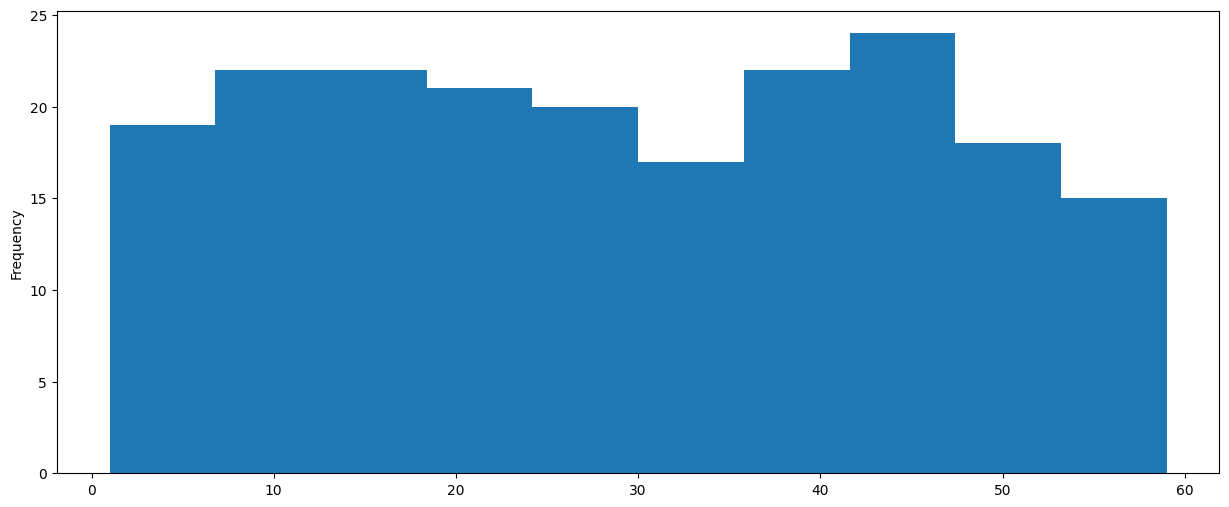

In [258]:
df_num['tenure_months'].plot.hist(figsize = (15,6), bins=10)

## Análisis Bivariado

In [259]:
matriz_corr = df_num.corr()
matriz_corr

,tenure_months,monthly_fee,total_usage_hours,num_support_tickets,churn
tenure_months,1.000,0.038,0.060,-0.032,0.044
monthly_fee,0.038,1.000,0.039,-0.032,0.440
total_usage_hours,0.060,0.039,1.000,0.048,-0.005
num_support_tickets,-0.032,-0.032,0.048,1.000,0.166
churn,0.044,0.440,-0.005,0.166,1.000


<Axes: >

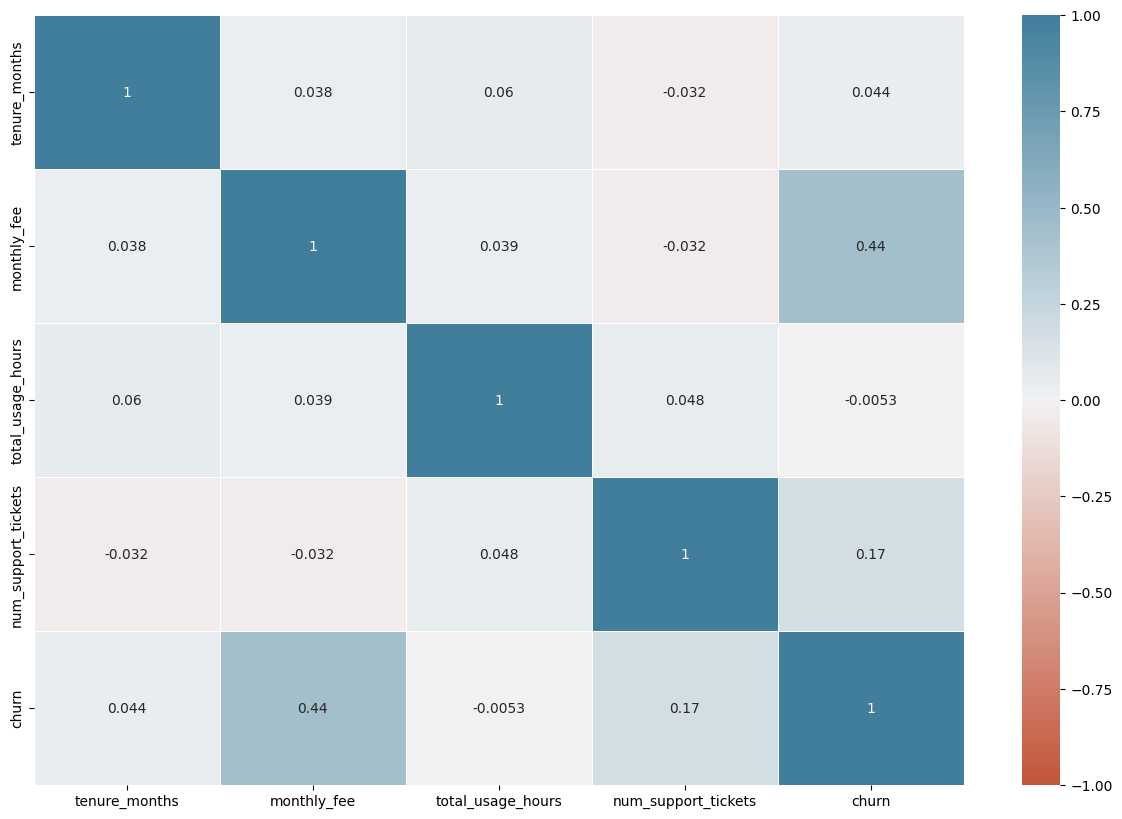

In [260]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data = df_num.corr(), center = 0, vmin =-1, vmax = 1, linewidths = 0.5,
            cmap = sns.diverging_palette(20,230,as_cmap = True), annot=True, ax=ax)

<Axes: xlabel='churn', ylabel='monthly_fee'>

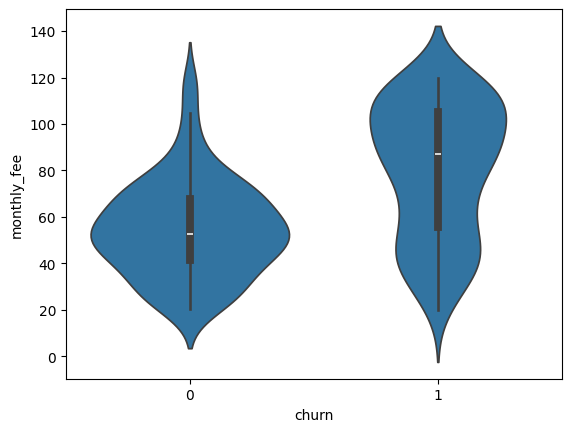

In [261]:
sns.violinplot(x='churn', y='monthly_fee', data=churn_df)

<Axes: xlabel='monthly_fee', ylabel='tenure_months'>

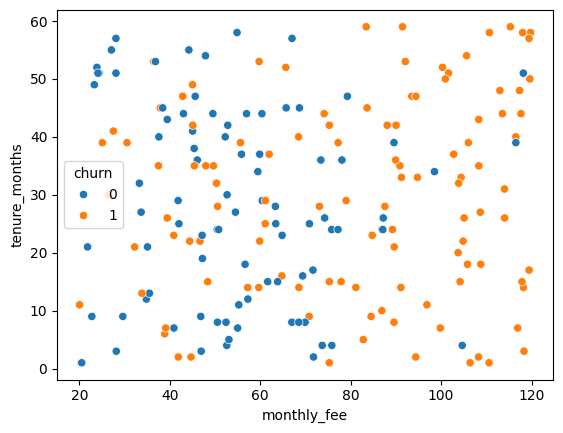

In [262]:
sns.scatterplot(
    x='monthly_fee',
    y='tenure_months',
    hue='churn',
    data=churn_df
)

<Axes: xlabel='contract_type'>

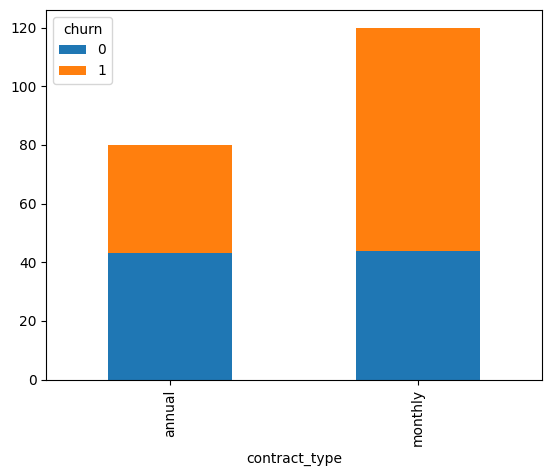

In [263]:
pd.crosstab(
    churn_df['contract_type'],
    churn_df['churn']
).plot(kind='bar',stacked=True)

In [264]:
pd.crosstab(churn_df['contract_type'], churn_df['churn'], margins=True, normalize=True)

churn,0,1,All
contract_type,,,
annual,0.215,0.185,0.400
monthly,0.220,0.380,0.600
All,0.435,0.565,1.000


In [265]:
df_num.corr()['churn'].sort_values(ascending=False)

,churn
churn,1.000
monthly_fee,0.440
num_support_tickets,0.166
tenure_months,0.044
total_usage_hours,-0.005


In [266]:
churn_df['high_fee']=(churn_df['monthly_fee']>churn_df['monthly_fee'].median()).astype('category')

In [267]:
pd.crosstab(churn_df['high_fee'], churn_df['churn'], normalize='index')

churn,0,1
high_fee,,
False,0.620,0.380
True,0.250,0.750


## Transformación de datos

In [268]:
from sklearn.preprocessing import OneHotEncoder

oneHE = OneHotEncoder(sparse_output = False, drop='first', dtype = 'int64')
df_oneHE = oneHE.fit_transform(df_cat)

df_oneHE = pd.DataFrame(data = df_oneHE, columns = oneHE.get_feature_names_out())
df_oneHE

,contract_type_monthly,has_discount_1
0,1,0
1,1,0
2,0,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,1,0
198,0,0


In [269]:
columns = ['tenure_months', 'monthly_fee', 'total_usage_hours', 'num_support_tickets']

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df_num[columns])
df_mms = mms.transform(df_num[columns])
df_mms = pd.DataFrame(data=df_mms, columns=columns)
df_mms

,tenure_months,monthly_fee,total_usage_hours,num_support_tickets
0,0.655,0.105,0.421,0.125
1,0.879,0.457,0.686,0.500
2,0.483,0.219,0.044,0.375
3,0.241,0.417,0.918,0.000
4,0.724,0.885,0.435,0.000
...,...,...,...,...
195,0.466,0.434,0.577,0.250
196,0.017,0.746,0.922,0.500
197,0.707,0.251,0.069,0.125
198,0.759,0.184,0.878,0.125


In [270]:
df_target=churn_df['churn']
df_target

,churn
0,1
1,1
2,0
3,0
4,1
...,...
195,0
196,1
197,1
198,0


In [271]:
df_final = pd.concat([df_oneHE, df_mms, df_target], axis=1)
df_final

,contract_type_monthly,has_discount_1,tenure_months,monthly_fee,total_usage_hours,num_support_tickets,churn
0,1,0,0.655,0.105,0.421,0.125,1
1,1,0,0.879,0.457,0.686,0.500,1
2,0,0,0.483,0.219,0.044,0.375,0
3,1,0,0.241,0.417,0.918,0.000,0
4,1,0,0.724,0.885,0.435,0.000,1
...,...,...,...,...,...,...,...
195,1,0,0.466,0.434,0.577,0.250,0
196,1,0,0.017,0.746,0.922,0.500,1
197,1,0,0.707,0.251,0.069,0.125,1
198,0,0,0.759,0.184,0.878,0.125,0


## Separación X y y

In [272]:
X = df_final.drop(columns = 'churn')
y = df_final['churn']

## Modelado

El objetivo es maximizar la identificación de clientes que abandonan el servicio, priorizando recall de la clase churn (1) para minimizar falsos negativos.

## Regresión Logística

In [273]:
# Importación de librería
from sklearn.linear_model import LogisticRegression

In [274]:
# Instanciar el objeto
logisticreg = LogisticRegression(solver = 'liblinear')

## Separar datos para train y test

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Entrenamiento del modelo

In [276]:
logisticreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [277]:
y_pred_RLog = logisticreg.predict(X_test)
y_pred_RLog

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [278]:
y_pred_RLog_proba = logisticreg.predict_proba(X_test)
y_pred_RLog_proba

array([[0.59165145, 0.40834855],
       [0.45676401, 0.54323599],
       [0.20549142, 0.79450858],
       [0.1199206 , 0.8800794 ],
       [0.33274925, 0.66725075],
       [0.35598872, 0.64401128],
       [0.26039958, 0.73960042],
       [0.35243509, 0.64756491],
       [0.32107083, 0.67892917],
       [0.23446487, 0.76553513],
       [0.28495098, 0.71504902],
       [0.38923246, 0.61076754],
       [0.48754114, 0.51245886],
       [0.26389873, 0.73610127],
       [0.73916307, 0.26083693],
       [0.71574902, 0.28425098],
       [0.69235114, 0.30764886],
       [0.69521192, 0.30478808],
       [0.25850042, 0.74149958],
       [0.41659832, 0.58340168],
       [0.7418013 , 0.2581987 ],
       [0.32435131, 0.67564869],
       [0.43103339, 0.56896661],
       [0.28841769, 0.71158231],
       [0.24970133, 0.75029867],
       [0.64905663, 0.35094337],
       [0.51420018, 0.48579982],
       [0.54998121, 0.45001879],
       [0.27864853, 0.72135147],
       [0.45663154, 0.54336846],
       [0.

## Evaluación

In [279]:
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score)

In [280]:
print(classification_report(y_test, y_pred_RLog))

              precision    recall  f1-score   support

           0       0.91      0.56      0.69        18
           1       0.72      0.95      0.82        22

    accuracy                           0.78        40
   macro avg       0.82      0.76      0.76        40
weighted avg       0.81      0.78      0.76        40



In [281]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_RLog)
cm

array([[10,  8],
       [ 1, 21]])

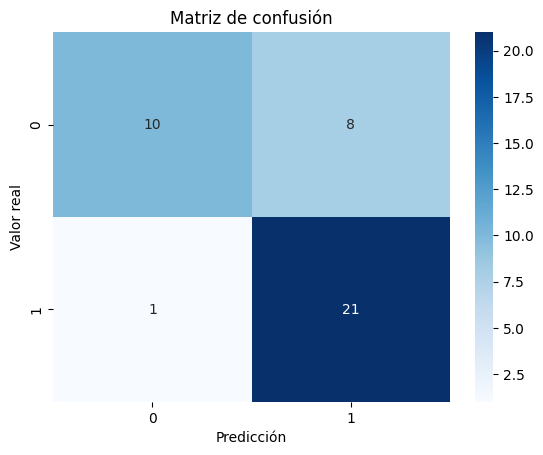

In [282]:
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues'),
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show()

In [283]:
roc_auc = roc_auc_score(y_test, y_pred_RLog_proba[:,1])
roc_auc

np.float64(0.8434343434343434)

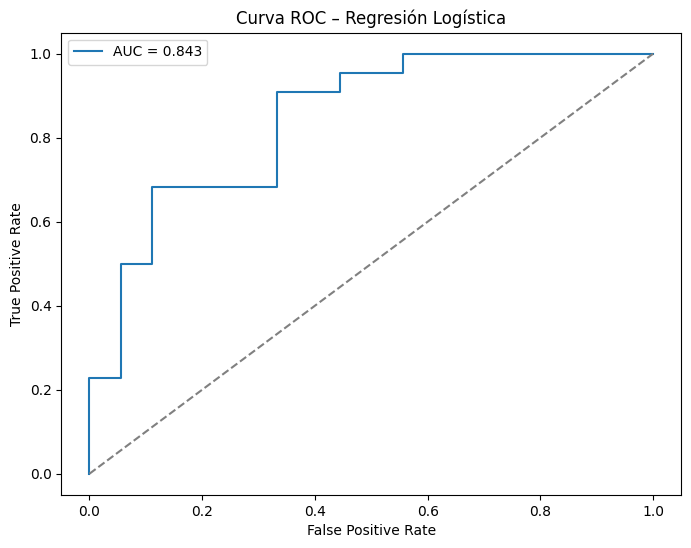

In [284]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RLog_proba[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC – Regresión Logística')
plt.legend()
plt.show()

## KNN

In [285]:
# Importación de librerias
from sklearn.neighbors import KNeighborsClassifier

In [286]:
# Instancia modelo
modelo_knn = KNeighborsClassifier(n_neighbors = 5)

In [287]:
# Entrenamiento del modelo
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [288]:
y_pred_knn = modelo_knn.predict(X_test)
y_pred_knn_proba = modelo_knn.predict_proba(X_test)


In [289]:
# Evaluación
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63        18
           1       0.70      0.73      0.71        22

    accuracy                           0.68        40
   macro avg       0.67      0.67      0.67        40
weighted avg       0.67      0.68      0.67        40



In [290]:
# matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[11,  7],
       [ 6, 16]])

<function matplotlib.pyplot.show(close=None, block=None)>

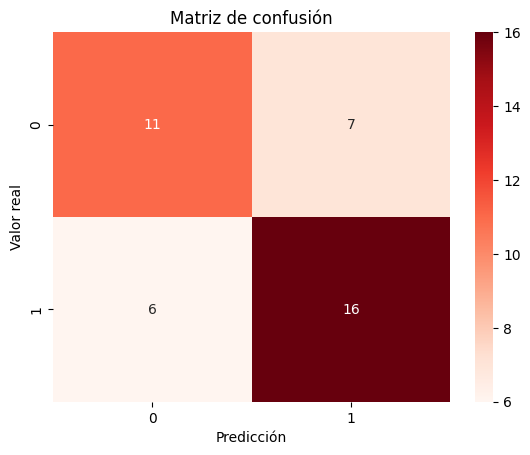

In [291]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')
plt.show

## Random Forest

In [292]:
#Importar librería
from sklearn.ensemble import RandomForestClassifier

In [293]:
#Instancia del modelo
modeloRF = RandomForestClassifier()

In [294]:
#Entrenamiento
modeloRF.fit(X_train, y_train)

RandomForestClassifier()

In [295]:
#Predecimos con los datos del test
y_pred_RF = modeloRF.predict(X_test)
y_pred_RF_proba = modeloRF.predict_proba(X_test)

## Evaluación

In [296]:
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score)

In [297]:
cm=confusion_matrix(y_test, y_pred_RF)

Text(0.5, 1.0, 'Matriz de confusión')

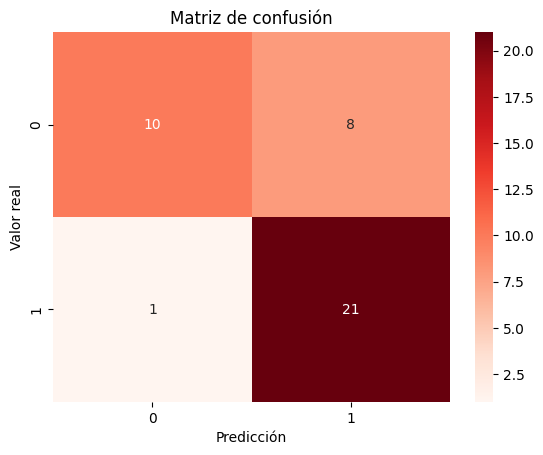

In [298]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')

In [299]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.91      0.56      0.69        18
           1       0.72      0.95      0.82        22

    accuracy                           0.78        40
   macro avg       0.82      0.76      0.76        40
weighted avg       0.81      0.78      0.76        40



## XGBOOST

In [300]:
#Importación Librería
from xgboost import XGBClassifier

In [301]:
#Instancia
modeloXGB = XGBClassifier(eval_metric="auc", use_label_encoder=False)

In [302]:
#Entrenamiento
modeloXGB.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose=False)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:47:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [303]:
#Predecimos
y_pred_XGB = modeloXGB.predict(X_test)
y_pred_XGB_proba = modeloXGB.predict_proba(X_test)
y_pred_XGB_proba[:,1][:10]

array([0.07728362, 0.059141  , 0.99736553, 0.9389941 , 0.88751245,
       0.15453716, 0.9940579 , 0.8907241 , 0.92030966, 0.9784238 ],
      dtype=float32)

In [304]:
#Evaluamos
cm = confusion_matrix(y_test, y_pred_XGB)
cm

array([[13,  5],
       [ 2, 20]])

Text(0.5, 1.0, 'Matriz de confusión')

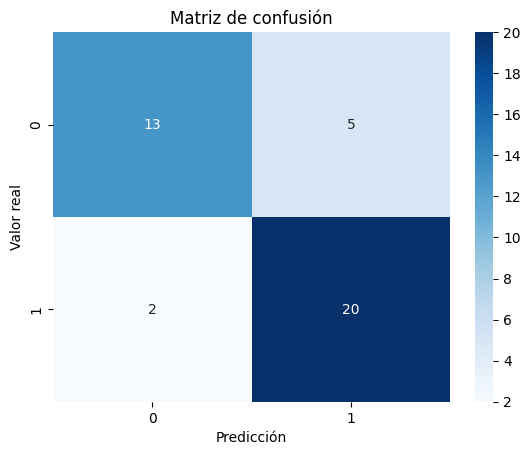

In [305]:
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión')

In [306]:
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.80      0.91      0.85        22

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40



## HIPERPARAMETRIZACIÓN - GRID SEARCH


In [307]:
#Random Forest
from sklearn.model_selection import GridSearchCV

In [308]:
rf_model = RandomForestClassifier()

In [309]:
grid_params = { 'criterion' : ['gini','entropy'],
                'max_depth' : [10, 14, 20],
                'max_features': [10, 20, 30],
                'min_samples_leaf': [2, 4],
                'min_samples_split':[5, 10],
                'n_estimators': [100, 500, 1000]}

In [310]:
grid_rf = GridSearchCV(
    estimator = rf_model,
    param_grid = grid_params,
    scoring = 'recall_weighted',
    n_jobs = -1,
    cv = 3,
)

In [311]:
#best_rf = grid_rf.fit(X_train, y_train)

In [312]:
#best_rf.best_params_

In [313]:
#best_rf.best_score_

In [314]:
#rf_final = best_rf.best_estimator_

In [315]:
#y_pred_rf_final = rf_final.predict(X_test)
#y_pred_rf_final_proba = rf_final.predict_proba(X_test)
#y_pred_rf_final_proba[:,1][:10]

In [316]:
#print(classification_report(y_test,y_pred_rf_final))

In [317]:
#cm = confusion_matrix(y_test, y_pred_rf_final)
#cm

## HIPERPARAMETRIZACIÓN - RANDOM SEARCH

In [318]:
random_parameters = { 'criterion': ['gini','entropy'],
                      'max_depth'        : [5, 10, 14, 20, 30],
                      'max_features'     : [10,20,30],
                      'min_samples_leaf' : [2, 4],
                      'min_samples_split': [5, 10],
                      'n_estimators'     : [100, 500, 1000]}

In [319]:
from sklearn.model_selection import RandomizedSearchCV

In [320]:
random_search_rf = RandomizedSearchCV (
                                        estimator = rf_model,
                                        param_distributions = random_parameters,
                                        n_iter              = 10,
                                        scoring             = 'roc_auc', #métrica que será evaluado para tener una mejor precisión
                                        n_jobs              = -1,
                                        cv                  = 3,
                                        verbose             = 0
                                      )

In [321]:
best_rf = random_search_rf.fit(X_train, y_train)

In [322]:
rf_final = best_rf.best_estimator_

In [323]:
y_pred_rf_final = rf_final.predict(X_test)
y_pred_rf_final_proba = rf_final.predict_proba(X_test)
y_pred_rf_final_proba[:,1][:10]

array([0.30597908, 0.27993856, 0.88313384, 0.91618629, 0.93905339,
       0.35394217, 0.88036411, 0.90102323, 0.8315    , 0.84626948])

In [324]:
print(classification_report(y_test,y_pred_rf_final))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71        18
           1       0.74      0.91      0.82        22

    accuracy                           0.78        40
   macro avg       0.79      0.76      0.76        40
weighted avg       0.79      0.78      0.77        40



In [325]:
cm = confusion_matrix(y_test, y_pred_rf_final)
cm

array([[11,  7],
       [ 2, 20]])

## Conclusiones

Random Forest fue seleccionado como modelo final debido a su mayor recall en la clase churn (1), lo que permite identificar la mayoría de clientes en riesgo. Aunque la hiperparametrización mejoró la estabilidad general del modelo, redujo la sensibilidad hacia la clase churn, por lo que se priorizó el modelo base alineado con el objetivo de negocio.